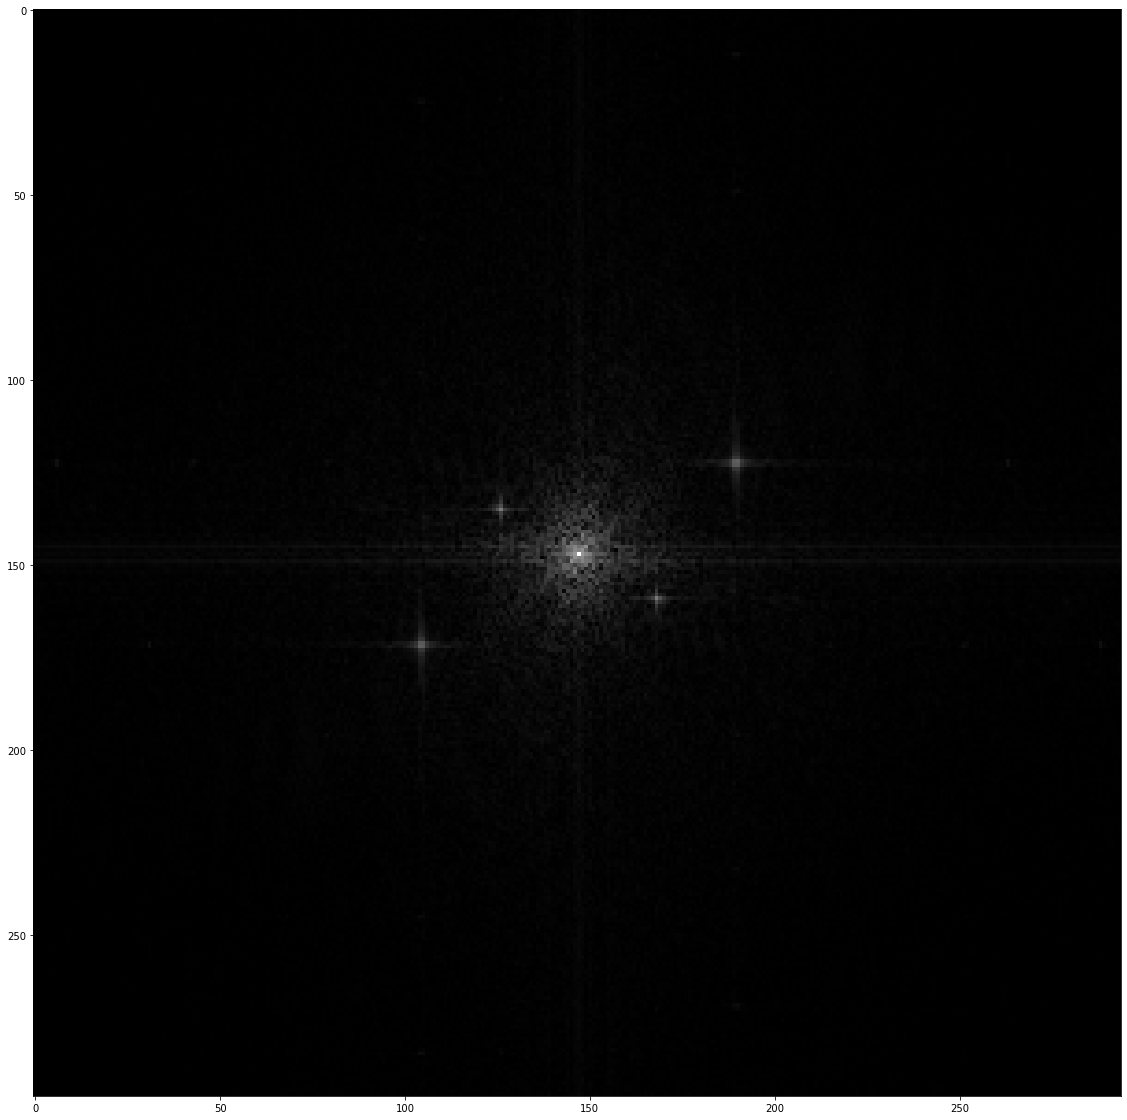

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy import fft as f
import os
from glob import glob

image = np.double(cv2.imread("./clown_noised.jpg", flags=cv2.IMREAD_GRAYSCALE))
fi = f.fftshift(f.fft2(image))
fi = abs(fi)
fi = np.log(fi/fi.max()*300 + 1)
fi = np.array((fi - fi.min())/fi.max()*255, dtype='uint8')
plt.figure(figsize=(20, 20))
plt.imshow(fi, 'gray');

In [ ]:
quit = False
q = input('do you want to delete previous files? y|n: ')
if q.lower() == 'y':
    os.system('rm -r ./noise/')
    i = 0
else:
    ls = os.listdir('./noise/')
    i = int(ls[-1].split('.')[0])
while not quit:
    i += 1
    x, y, w, h = cv2.selectROI('please select the noise', fi)
    noise = fi[y:y+h, x:x+w]
    if not os.path.exists('./noise'):
        os.mkdir('./noise')
    cv2.imwrite(f'./noise/{i}.jpg', noise)
    q = input("do you want to continue? y|n: ")
    if q.lower() == 'y':
        quit = False
    else:
        quit = True
 

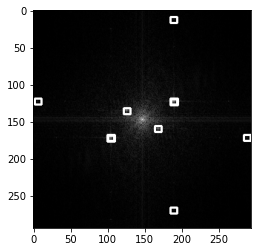

In [2]:
fi = f.fftshift(f.fft2(image))
fi = np.hypot(fi.real, fi.imag)
fi = np.log(fi/fi.max()*1000+1)
fi = np.array((fi - fi.min())/fi.max()*255, dtype='uint8')

fi_original = f.fftshift(f.fft2(image))

threshold = 0.67 #Pick only values above 0.8. For TM_CCOEFF_NORMED, larger values = good fit.
files = glob('./noise/*.jpg')
for file in files: 
    noise = cv2.imread(file, 0)
    h, w = noise.shape[::]
    res = cv2.matchTemplate(fi.astype(np.uint8), noise.astype(np.uint8), method=cv2.TM_CCOEFF_NORMED)
    loc = np.where( res >= threshold)  
    #Outputs 2 arrays. Combine these arrays to get x,y coordinates - take x from one array and y from the other.

    #Reminder: ZIP function is an iterator of tuples where first item in each iterator is paired together,
    #then the second item and then third, etc. 

    for pt in zip(*loc[::-1]):   #-1 to swap the values as we assign x and y coordinate to draw the rectangle. 
        #Draw rectangle around each object. We know the top left (pt), draw rectangle to match the size of the template image.
        fi_original[pt[1]:pt[1] + h, pt[0]:pt[0] + w] = 0
        cv2.rectangle(fi, pt, (pt[0] + w, pt[1] + h), 255, 2)  #Red rectangles with thickness 2. 
    plt.imshow(fi, 'gray')

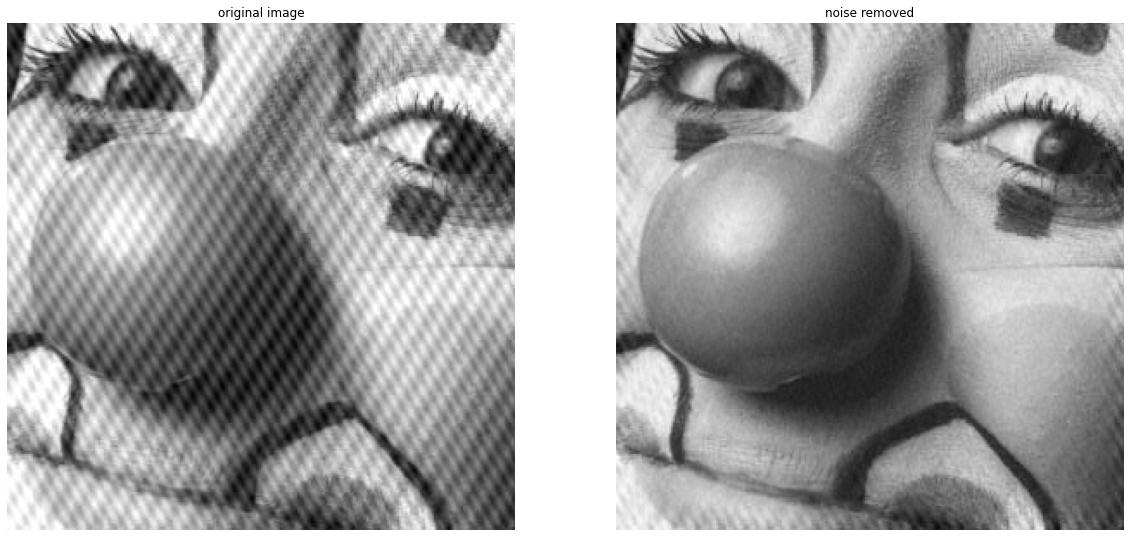

In [3]:
new_image = f.ifft2(f.ifftshift(fi_original))
new_image = np.abs(new_image)
new_image = (new_image - new_image.min()) / new_image.max() * 255
plt.figure(figsize=(20, 20))
plt.subplot(121)
plt.title('original image')
plt.axis(False)
plt.imshow(image, 'gray')
plt.subplot(122)
plt.title('noise removed')
plt.imshow(new_image.astype('uint8'), 'gray')
plt.axis(False);

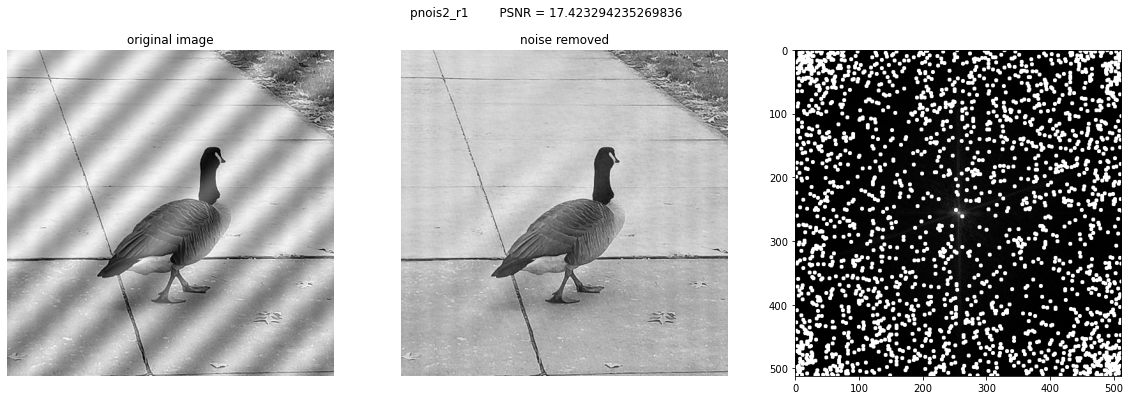

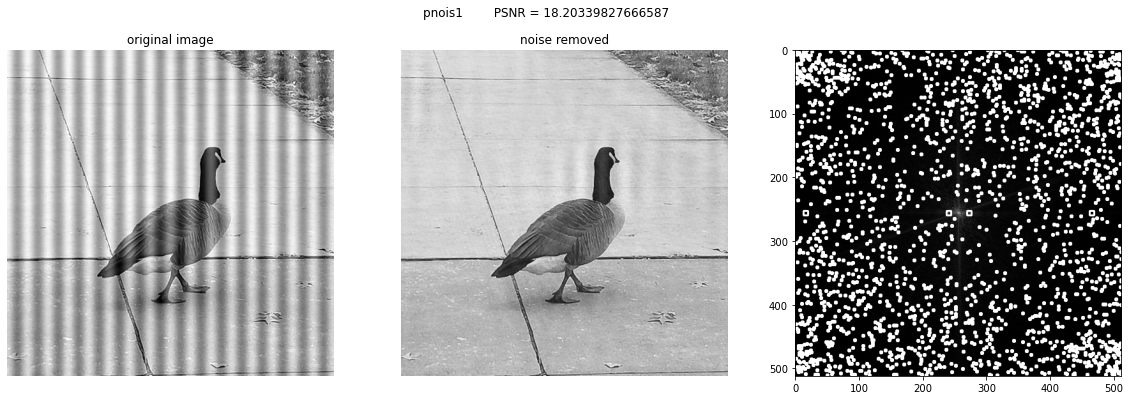

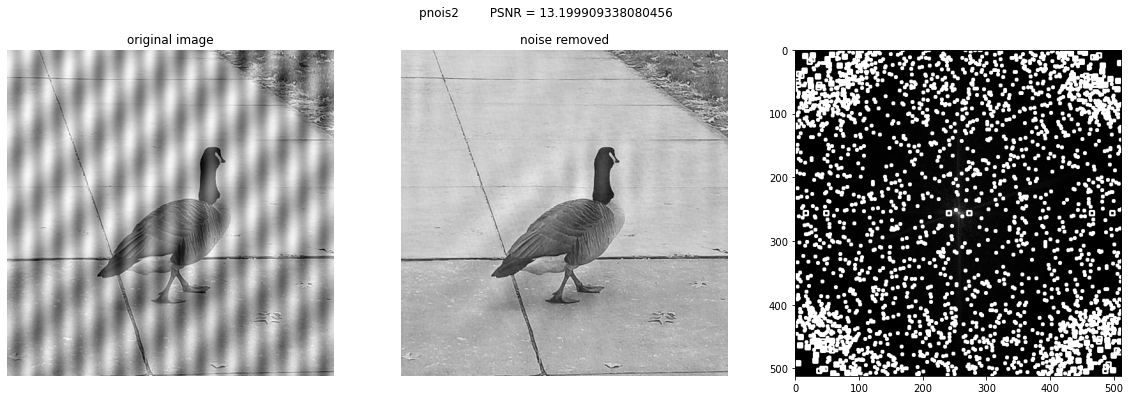

In [16]:
original_image = cv2.imread('./goose.jpg', flags=cv2.IMREAD_GRAYSCALE)
images = glob("images/*.jpg")
for image in images:
    file = image.split('.')[0]
    image = np.double(cv2.imread(image, flags=cv2.IMREAD_GRAYSCALE))
    fi = f.fftshift(f.fft2(image))
    fi_original = fi.copy()
    fi = np.hypot(fi.real, fi.imag)
    fi = np.log(fi/fi.max()*1000+1)
    fi = np.array((fi - fi.min())/fi.max()*255, dtype='uint8')

    # q = input(f"do you want to mark the noises for {file}? y|n: ")
    # quit = q.lower() != 'y'
    # if not quit:
    #     q = input('start from begining? y|n: ')
    #     if q.lower() == 'y':
    #         os.system(f'rm -r ./{file}/')
    #         i = 0
    #     else:
    #         ls = os.listdir(f'./{file}/')
    #         i = int(ls[-1].split('.')[0])
    #     while not quit:
    #         i += 1
    #         x, y, w, h = cv2.selectROI('please select the noise', fi)
    #         noise = fi[y:y+h, x:x+w]
    #         if not os.path.exists(f'./{file}'):
    #             os.mkdir(f'./{file}')
    #         cv2.imwrite(f'./{file}/{i}.jpg', noise)
    #         q = input("do you want to continue? y|n: ")
    #         if q.lower() == 'y':
    #             quit = False
    #         else:
    #             quit = True


    threshold = 0.78 #Pick only values above 0.8. For TM_CCOEFF_NORMED, larger values = good fit.
    files = glob(f'./{file}/*.jpg')
    for file_ in files: 
        noise = cv2.imread(file_, 0)
        h, w = noise.shape[::]
        res = cv2.matchTemplate(fi.astype(np.uint8), noise.astype(np.uint8), method=cv2.TM_CCOEFF_NORMED)
        loc = np.where( res >= threshold)  
        #Outputs 2 arrays. Combine these arrays to get x,y coordinates - take x from one array and y from the other.

        #Reminder: ZIP function is an iterator of tuples where first item in each iterator is paired together,
        #then the second item and then third, etc. 

        for pt in zip(*loc[::-1]):   #-1 to swap the values as we assign x and y coordinate to draw the rectangle. 
            #Draw rectangle around each object. We know the top left (pt), draw rectangle to match the size of the template image.
            if (np.abs(pt[1] - image.shape[1]/2) > 2) and (np.abs(pt[0] - image.shape[0]/2) > 2):
                fi_original[pt[1]:pt[1] + h, pt[0]:pt[0] + w] = 0
                cv2.rectangle(fi, pt, (pt[0] + w, pt[1] + h), 255, 2)  #Red rectangles with thickness 2. 
    
    

    new_image = f.ifft2(f.ifftshift(fi_original))
    new_image = np.abs(new_image)
    new_image = np.array((new_image - new_image.min()) / new_image.max() * 255, 'uint8')

    psnr = cv2.PSNR(original_image, new_image)


    plt.figure(figsize=(20, 6))
    plt.suptitle(f"{file.split('/')[-1]}        PSNR = {psnr:.2f}")
    plt.subplot(131)
    plt.title('original image')
    plt.axis(False)
    plt.imshow(image, 'gray')
    plt.subplot(132)
    plt.title('noise removed')
    plt.imshow(new_image.astype('uint8'), 'gray')
    plt.axis(False);
    plt.subplot(133)
    plt.imshow(fi, 'gray')
    plt.show()